In [1]:
%matplotlib inline

# point cloud
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file = "test.pcd.bin"

In [3]:
#   x,y,z就是基于激光雷达的3d坐标系
#   intensity,反射强度（指的是，激光接收器接受的反射次数）
#       - 更多的是跟激光打上的物理性质有关
#   ring index,激光不是32线吗，他就是1-32
# [x, y, z, intensity, ring index]
pc = np.frombuffer(open(file, "rb").read(), dtype=np.float32)
pc = pc.reshape((-1, 5))[:, :4]

In [4]:
x, y, z, intensity = pc.T

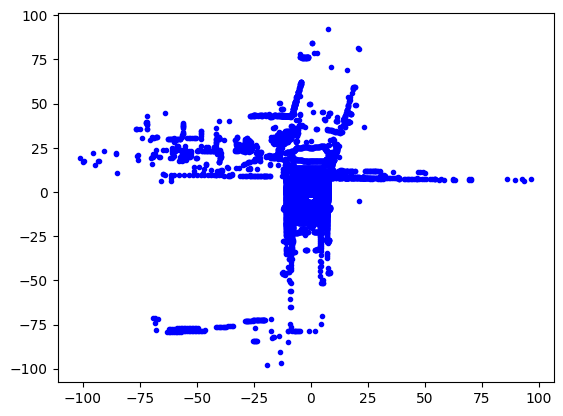

In [5]:
plt.plot(x, y, ".b") #
plt.show()

# 1. 图像显示改进

In [6]:
import cv2

In [7]:
#   设置图像尺寸1024x1024
image_size = 1024

In [8]:
#   把数据归一化
#   点的坐标范围大概是100
pc_range = 100
x = x / pc_range
y = y / pc_range

In [9]:
#   缩放到图像尺寸，并平移到图像中心
half_image_size = image_size / 2
x = (x + 1) * half_image_size
y = (y + 1) * half_image_size

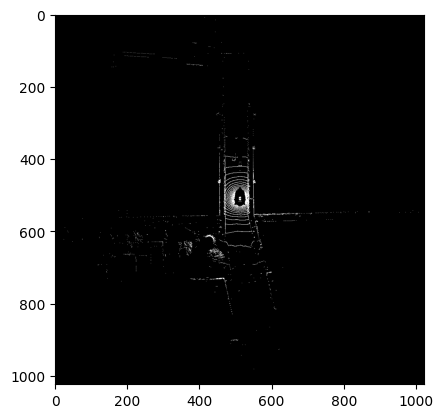

In [10]:
#   openCV使用numpy创建图像
image = np.zeros((image_size, image_size, 3), dtype=np.uint8)

for ix, iy in zip(x, y):
    ix = int(ix)
    iy = int(iy)
    if ix >= 0 and ix < image_size and iy >= 0 and iy < image_size:
        image[iy, ix] = 255, 255, 255

cv2.imwrite("a.jpg", image)

#   显示图像
# cv2.imshow("test", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

im = image[:, :, ::-1]
plt.imshow(im)
plt.show()

# 2. 根据intensity强度显示明亮

In [11]:
intensity.max(), intensity.min()

(255.0, 0.0)

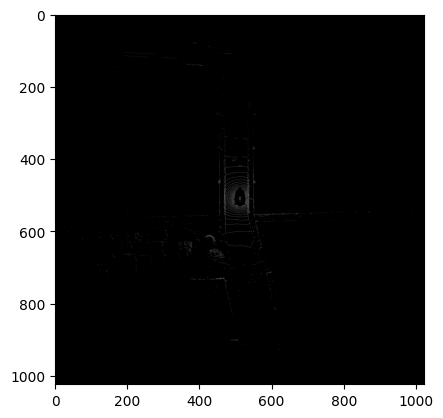

In [12]:
image = np.zeros((image_size, image_size, 3), dtype=np.uint8)

for ix, iy, iv in zip(x, y, intensity):  # add intensity
    ix = int(ix)
    iy = int(iy)

    # intensity大小反应颜色明亮
    color = (iv / 255) * 200 + 55

    if ix >= 0 and ix < image_size and iy >= 0 and iy < image_size:
        image[iy, ix] = color, color, color

cv2.imwrite("b.jpg", image)

#   显示图像
# cv2.imshow("test", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

im = image[:, :, ::-1]
plt.imshow(im)
plt.show()